In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import os

contenidos = os.listdir(r'Datos')
ruta = [r'Datos\{}'.format(n) for n in contenidos]
Columns = [n[0:-5] for n in contenidos]


MC = pd.read_excel(ruta[Columns.index('Dolar')])
MC = MC.dropna()
MC.columns = ['Fecha','Dolar']
MC['Variacion Dolar'] = np.nan



for n in range(len(Columns)):
    if f"{Columns[n]}" == 'Dolar': continue
    df = pd.read_excel(ruta[n])
    MC[f"{Columns[n]}"] = df['Valor']
    MC[f"Variacion {Columns[n]}"] = np.nan


MC.to_csv('MC.csv', index=False)
MC

,Fecha,Dolar,Variacion Dolar,Cobre,Variacion Cobre,Euro,Variacion Euro,Libra Esterlina,Variacion Libra Esterlina,TCM,Variacion TCM,UF,Variacion UF
0,2017-01-03,669.47,NaN,2.4812,NaN,705.60,NaN,826.10,NaN,106.19,NaN,26350.53,NaN
1,2017-01-04,673.36,NaN,2.5052,NaN,702.00,NaN,825.50,NaN,106.49,NaN,26351.38,NaN
2,2017-01-05,671.78,NaN,2.4887,NaN,703.51,NaN,827.11,NaN,106.59,NaN,26352.23,NaN
3,2017-01-06,666.41,NaN,2.5533,NaN,706.09,NaN,826.50,NaN,106.64,NaN,26353.08,NaN
6,2017-01-09,665.29,NaN,2.5222,NaN,701.26,NaN,817.51,NaN,106.06,NaN,26355.63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,2022-11-08,919.58,NaN,3.6905,NaN,921.79,NaN,1057.96,NaN,120.52,NaN,34680.44,NaN
2120,2022-11-09,907.35,NaN,3.5946,NaN,914.94,NaN,1050.42,NaN,119.11,NaN,34690.47,NaN
2121,2022-11-10,904.42,NaN,3.6866,NaN,907.41,NaN,1030.21,NaN,118.54,NaN,34696.24,NaN
2122,2022-11-11,893.54,NaN,3.6806,NaN,906.87,NaN,1040.69,NaN,117.61,NaN,34702.01,NaN


In [2]:
import datetime as dt
import numpy as np
import pandas as pd

MC = pd.read_csv(r'MC.csv')


for n in range(len(Columns)):
    for indice, fila in MC.iterrows():
        if indice > 0: 
            FechaAnt = MC.loc[indice-1,['Fecha']].sum()
            FechaAnt = dt.datetime.fromisoformat(FechaAnt)
            Fecha = MC.loc[indice,['Fecha']].sum()
            Fecha = dt.datetime.fromisoformat(Fecha)
            ValorAnt = MC.loc[indice-1,[f"{Columns[n]}"]].sum()
            Valor = MC.loc[indice,[f"{Columns[n]}"]].sum()
            DifDias = (Fecha - FechaAnt).days
            Variacion = (Valor-ValorAnt)/DifDias
        else:
            Variacion = 0
        MC.loc[indice,[f'Variacion {Columns[n]}']] = Variacion
MC.to_csv('MC.csv', index=False)
MC

,Fecha,Dolar,Variacion Dolar,Cobre,Variacion Cobre,Euro,Variacion Euro,Libra Esterlina,Variacion Libra Esterlina,TCM,Variacion TCM,UF,Variacion UF
0,2017-01-03,669.47,0.000000,2.4812,0.000000,705.60,0.00,826.10,0.000000,106.19,0.000000,26350.53,0.00
1,2017-01-04,673.36,3.890000,2.5052,0.024000,702.00,-3.60,825.50,-0.600000,106.49,0.300000,26351.38,0.85
2,2017-01-05,671.78,-1.580000,2.4887,-0.016500,703.51,1.51,827.11,1.610000,106.59,0.100000,26352.23,0.85
3,2017-01-06,666.41,-5.370000,2.5533,0.064600,706.09,2.58,826.50,-0.610000,106.64,0.050000,26353.08,0.85
4,2017-01-09,665.29,-0.373333,2.5222,-0.010367,701.26,-1.61,817.51,-2.996667,106.06,-0.193333,26355.63,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2022-11-08,919.58,-12.790000,3.6905,0.245000,921.79,-2.91,1057.96,3.240000,120.52,-1.830000,34680.44,10.02
1455,2022-11-09,907.35,-12.230000,3.5946,-0.095900,914.94,-6.85,1050.42,-7.540000,119.11,-1.410000,34690.47,10.03
1456,2022-11-10,904.42,-2.930000,3.6866,0.092000,907.41,-7.53,1030.21,-20.210000,118.54,-0.570000,34696.24,5.77
1457,2022-11-11,893.54,-10.880000,3.6806,-0.006000,906.87,-0.54,1040.69,10.480000,117.61,-0.930000,34702.01,5.77


In [48]:
import datetime as dt
import numpy as np
import pandas as pd

MC = pd.read_csv(r'MC.csv')
MC['Aumenta Mañana'] = np.nan

for indice, fila in MC.iterrows():
    if indice < 249:
        Dolar = float(MC.loc[indice,['Dolar']])
        DolarSigDia = float(MC.loc[indice+1,['Dolar']])
        variacion = DolarSigDia - Dolar
    else:
        variacion = -1
    
    if variacion >= 0:
        MC.loc[indice,['Aumenta Mañana']] = 1
    else:
        MC.loc[indice,['Aumenta Mañana']] = 0
MC.to_csv('MC.csv', index=False)

MC

,Fecha,Dolar,Variacion Dolar,Cobre,Variacion Cobre,Euro,Variacion Euro,Libra Esterlina,Variacion Libra Esterlina,TCM,Variacion TCM,UF,Variacion UF,Aumenta Mañana
0,2017-01-03,669.47,0.000000,2.4812,0.000000,705.60,0.00,826.10,0.000000,106.19,0.000000,26350.53,0.00,1.0
1,2017-01-04,673.36,3.890000,2.5052,0.024000,702.00,-3.60,825.50,-0.600000,106.49,0.300000,26351.38,0.85,0.0
2,2017-01-05,671.78,-1.580000,2.4887,-0.016500,703.51,1.51,827.11,1.610000,106.59,0.100000,26352.23,0.85,0.0
3,2017-01-06,666.41,-5.370000,2.5533,0.064600,706.09,2.58,826.50,-0.610000,106.64,0.050000,26353.08,0.85,0.0
4,2017-01-09,665.29,-0.373333,2.5222,-0.010367,701.26,-1.61,817.51,-2.996667,106.06,-0.193333,26355.63,0.85,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2022-11-08,919.58,-12.790000,3.6905,0.245000,921.79,-2.91,1057.96,3.240000,120.52,-1.830000,34680.44,10.02,0.0
1455,2022-11-09,907.35,-12.230000,3.5946,-0.095900,914.94,-6.85,1050.42,-7.540000,119.11,-1.410000,34690.47,10.03,0.0
1456,2022-11-10,904.42,-2.930000,3.6866,0.092000,907.41,-7.53,1030.21,-20.210000,118.54,-0.570000,34696.24,5.77,0.0
1457,2022-11-11,893.54,-10.880000,3.6806,-0.006000,906.87,-0.54,1040.69,10.480000,117.61,-0.930000,34702.01,5.77,0.0


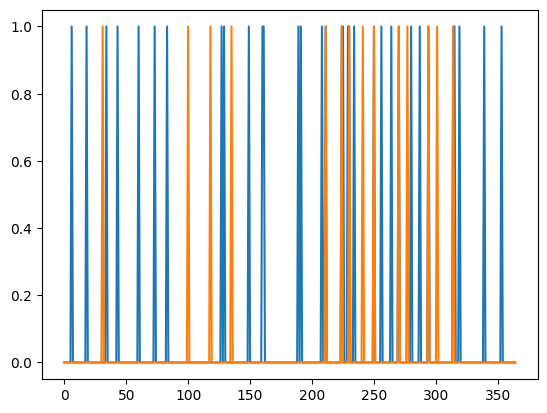

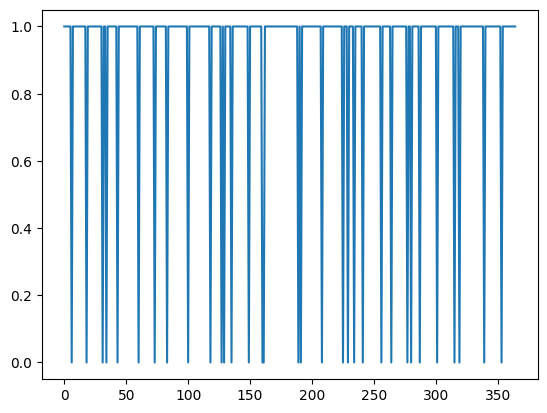

In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

MC = pd.read_csv(r'MC.csv')

caracteristicas = list(MC.columns)
caracteristicas.remove('Fecha')
caracteristicas.remove('Aumenta Mañana')
X = MC.loc[:,caracteristicas].to_numpy()
etiqueta = ['Aumenta Mañana']
y = MC.loc[:,etiqueta].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

ad = DecisionTreeClassifier(max_depth = 6)
ad.fit(X_train, y_train)
Y_pred = ad.predict(X_test)

fig, ax = plt.subplots()
ax.plot(y_test)
ax.plot(Y_pred)


fig, ax = plt.subplots()
L=[]
for n in range(len(y_test)):
    if y_test[n]==Y_pred[n]:
        m=1
    else: m=0
    L+=[m]
ax.plot(L)


In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
MC = pd.read_csv(r'MC.csv')


caracteristicas = list(MC.columns)
caracteristicas.remove('Fecha')
caracteristicas.remove('Aumenta Mañana')


X = MC.loc[:,caracteristicas].to_numpy()

etiqueta = ['Aumenta Mañana']
y = MC.loc[:,etiqueta].to_numpy()
#print(sum(y)/float(len(y))*100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
ad = RandomForestClassifier()
ad.fit(X_train, y_train)
Y_pred = ad.predict(X_test)

from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, Y_pred).ravel()
#print(list(zip(Y_pred,y_test)))

correctitud = (tp+tn)/float(tp+fp+fn+tn)
sensibilidad = (tp)/float(tp+fn)
especificidad = (tn)/float(fp+tn)
precision = (tp)/float(tp+fp)
tasa_real = (tp+fn)/float(tp+fp+fn+tn)
f1_score = 2*(precision*sensibilidad)/float(precision+sensibilidad)


print("correctitud: " + str(np.round(correctitud*100,2)) + "%")
print("sensibilidad: " + str(np.round(sensibilidad*100,2)) + "%")
print("especificidad: " + str(np.round(especificidad*100,2)) + "%")
print("precision: " + str(np.round(precision*100,2)) + "%")
print("tasa_real: " + str(np.round(tasa_real*100,2)) + "%")
print("f1_score: " + str(np.round(f1_score*100,2)) + "%")


correctitud: 91.23%
sensibilidad: 25.81%
especificidad: 97.31%
precision: 47.06%
tasa_real: 8.49%
f1_score: 33.33%


C:\Users\franc\AppData\Local\Temp\ipykernel_224\881357727.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ad.fit(X_train, y_train)


In [21]:
import datetime as dt
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')
MC = pd.read_csv(r'MC.csv')

caracteristicas = list(MC.columns)
caracteristicas.remove('Fecha')
caracteristicas.remove('Aumenta Mañana')

X = MC.loc[:,caracteristicas].to_numpy()

etiqueta = ['Aumenta Mañana']
y = MC.loc[:,etiqueta].to_numpy()


#------------------------------------------------------------------------

from sklearn.model_selection import cross_val_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


ad_cv = cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='roc_auc')
rf_cv = cross_val_score(RandomForestClassifier(), X, y, cv=10, scoring='roc_auc')
ab_cv = cross_val_score(AdaBoostClassifier(), X, y, cv=10, scoring='roc_auc')
gb_cv = cross_val_score(GradientBoostingClassifier(), X, y, cv=10, scoring='roc_auc')
ld_cv = cross_val_score(LinearDiscriminantAnalysis(), X, y, cv=10, scoring='roc_auc')
gn_cv = cross_val_score(GaussianNB(), X, y, cv=10, scoring='roc_auc')
lr_cv = cross_val_score(LogisticRegression(), X, y, cv=10, scoring='roc_auc')
knn_cv = cross_val_score(KNeighborsClassifier(), X, y, cv=10, scoring='roc_auc')
svc_cv = cross_val_score(SVC(), X, y, cv=10, scoring='roc_auc')
mlp_cv = cross_val_score(MLPClassifier(), X, y, cv=10, scoring='roc_auc')


print("AD: " + str(np.round(np.mean(ad_cv)*100,2)))
print("RF: " + str(np.round(np.mean(rf_cv)*100,2)))
print("AB: " + str(np.round(np.mean(ab_cv)*100,2)))
print("GB: " + str(np.round(np.mean(gb_cv)*100,2)))
print("LD: " + str(np.round(np.mean(ld_cv)*100,2)))
print("GN: " + str(np.round(np.mean(gn_cv)*100,2)))
print("LR: " + str(np.round(np.mean(lr_cv)*100,2)))
print("KNN: " + str(np.round(np.mean(knn_cv)*100,2)))
print("SVC: " + str(np.round(np.mean(svc_cv)*100,2)))
print("MLP: " + str(np.round(np.mean(mlp_cv)*100,2)))


AD: 64.85
RF: 93.79
AB: 88.91
GB: 95.09
LD: 97.68
GN: 92.83
LR: 92.36
KNN: 69.09
SVC: 19.13
MLP: 60.55


In [12]:
import datetime as dt
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')
MC = pd.read_csv(r'MC.csv')

caracteristicas = list(MC.columns)
caracteristicas.remove('Fecha')
caracteristicas.remove('Aumenta Mañana')

X = MC.loc[:,caracteristicas].to_numpy()

etiqueta = ['Aumenta Mañana']
y = MC.loc[:,etiqueta].to_numpy()

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#------------------------------------------------------------------------

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


# Random Forest
modelo1 = RandomForestClassifier()
modelo1.fit(X_train, y_train)
modelo1_y_pred = modelo1.predict(X_test)

# Gradient Boosting
modelo2 = GradientBoostingClassifier()
modelo2.fit(X_train, y_train)
modelo2_y_pred = modelo2.predict(X_test)

# LDA
modelo3 = LinearDiscriminantAnalysis()
modelo3.fit(X_train, y_train)
modelo3_y_pred = modelo3.predict(X_test)


#------------------------------------------------------------------------

preds = [np.mean([p1, p2, p3]) for (p1, p2, p3) in zip(modelo1_y_pred, modelo2_y_pred, modelo3_y_pred)]
preds_ensamble = [1 if prob >= 0.5 else 0 for prob in preds]


from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
import matplotlib.pyplot as plt

def Graf(pred_modelo):
    fig, ax = plt.subplots()
    ax.plot(y_test)
    ax.plot(pred_modelo)

    fig, ax = plt.subplots()
    L=[]
    for n in range(len(y_test)):
        if y_test[n]==pred_modelo[n]:
            m=1
        else: m=0
        L+=[m]
    ax.plot(L)

def Imp(model):
    importance = model.feature_importances_

    for i,v in enumerate(importance):
        print('Feature: %0s, Score: %.2f' % (caracteristicas[i],v*100))
        
    fig, ax = plt.subplots()
    y_pos = range(len(caracteristicas))
    pyplot.bar(y_pos, importance)
    pyplot.xticks(y_pos, caracteristicas, rotation=90)
    pyplot.show()




In [29]:
def Imp2(model):
    from sklearn.inspection import permutation_importance

    results = permutation_importance(model, X, y, scoring='roc_auc')
    importance_0 = results.importances_mean
    importance = [ii/sum(importance_0) for ii in importance_0]

    for i,v in enumerate(importance):
        print('Feature: %0s, Score: %.2f' % (caracteristicas[i],v*100))

    y_pos = range(len(caracteristicas))
    pyplot.bar(y_pos, importance)
    pyplot.xticks(y_pos, caracteristicas, rotation=90)
    pyplot.show()

Random Forest:
  Accuracy Score  : 0.88
  Precision Score : 0.38
  Recall Score    : 0.29
  F1 Score        : 0.33
  ROC AUC Score   : 0.62


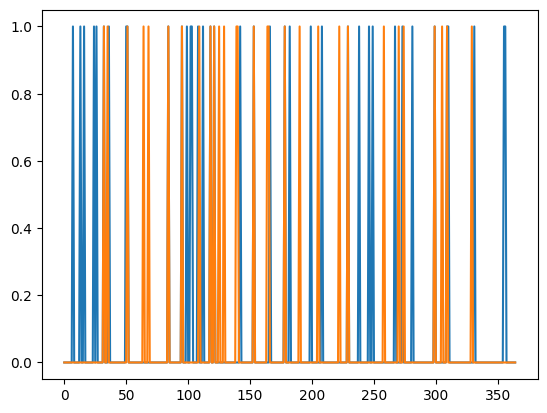

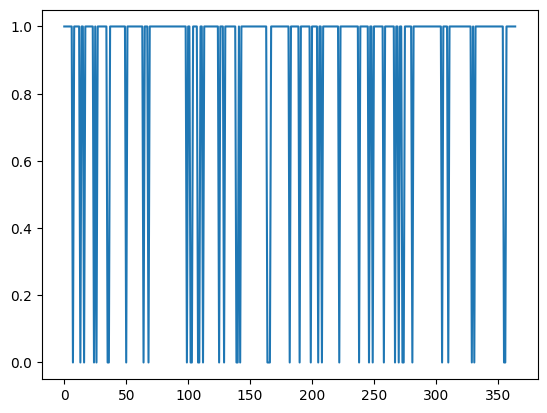

In [24]:
print("Random Forest:")
print(f"  Accuracy Score  : {round(accuracy_score(y_test, modelo1_y_pred), 2)}")
print(f"  Precision Score : {round(precision_score(y_test, modelo1_y_pred), 2)}")
print(f"  Recall Score    : {round(recall_score(y_test, modelo1_y_pred), 2)}")
print(f"  F1 Score        : {round(f1_score(y_test, modelo1_y_pred), 2)}")
print(f"  ROC AUC Score   : {round(roc_auc_score(y_test, modelo1_y_pred), 2)}")

Graf(modelo1_y_pred)

Feature: Dolar, Score: 8.21
Feature: Variacion Dolar, Score: 5.33
Feature: Cobre, Score: 4.70
Feature: Variacion Cobre, Score: 5.60
Feature: Euro, Score: 10.08
Feature: Variacion Euro, Score: 5.83
Feature: Libra Esterlina, Score: 9.37
Feature: Variacion Libra Esterlina, Score: 4.95
Feature: TCM, Score: 7.85
Feature: Variacion TCM, Score: 4.86
Feature: UF, Score: 27.41
Feature: Variacion UF, Score: 5.82


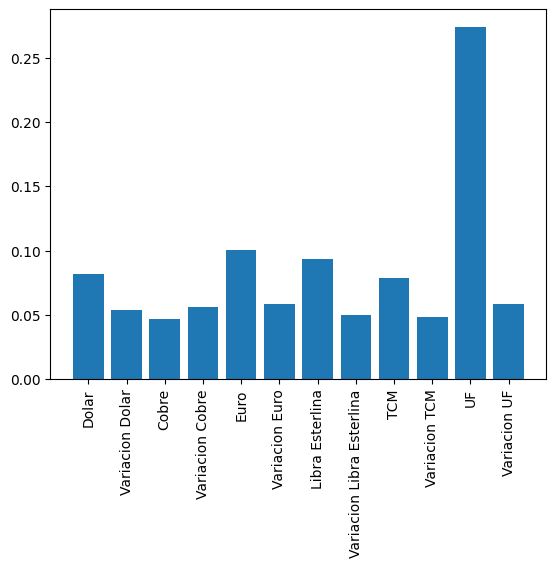

Feature: Dolar, Score: 0.81
Feature: Variacion Dolar, Score: -0.05
Feature: Cobre, Score: -0.29
Feature: Variacion Cobre, Score: 1.00
Feature: Euro, Score: 0.32
Feature: Variacion Euro, Score: 1.90
Feature: Libra Esterlina, Score: 2.11
Feature: Variacion Libra Esterlina, Score: 1.46
Feature: TCM, Score: -0.71
Feature: Variacion TCM, Score: 1.46
Feature: UF, Score: 89.78
Feature: Variacion UF, Score: 2.20


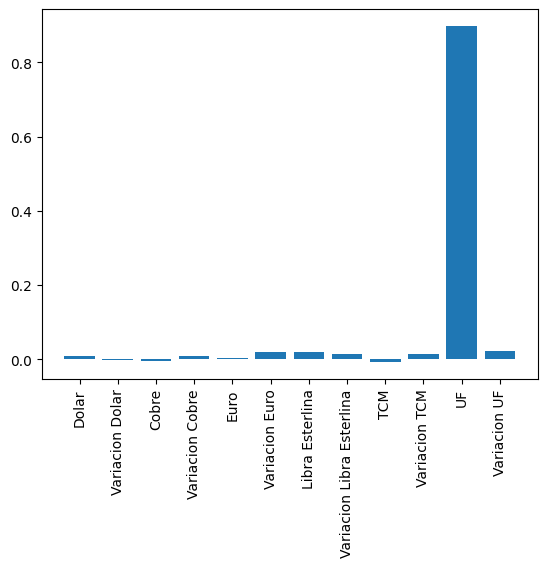

In [30]:
Imp(modelo1)
Imp2(modelo1)

Gradient Boosting:
  Accuracy Score  : 0.9
  Precision Score : 0.53
  Recall Score    : 0.45
  F1 Score        : 0.49
  ROC AUC Score   : 0.7


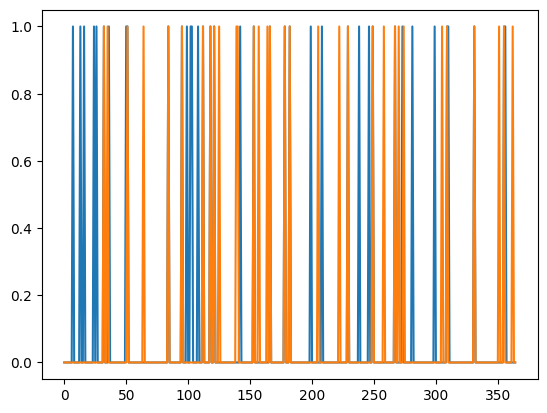

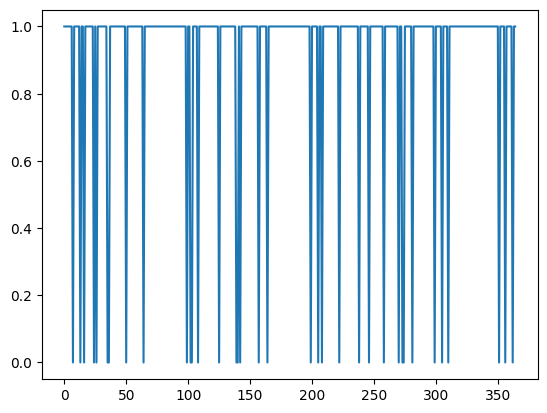

In [25]:
print("Gradient Boosting:")
print(f"  Accuracy Score  : {round(accuracy_score(y_test, modelo2_y_pred), 2)}")
print(f"  Precision Score : {round(precision_score(y_test, modelo2_y_pred), 2)}")
print(f"  Recall Score    : {round(recall_score(y_test, modelo2_y_pred), 2)}")
print(f"  F1 Score        : {round(f1_score(y_test, modelo2_y_pred), 2)}")
print(f"  ROC AUC Score   : {round(roc_auc_score(y_test, modelo2_y_pred), 2)}")

Graf(modelo2_y_pred)

Feature: Dolar, Score: 3.25
Feature: Variacion Dolar, Score: 3.86
Feature: Cobre, Score: 1.13
Feature: Variacion Cobre, Score: 3.90
Feature: Euro, Score: 5.30
Feature: Variacion Euro, Score: 5.32
Feature: Libra Esterlina, Score: 6.53
Feature: Variacion Libra Esterlina, Score: 4.53
Feature: TCM, Score: 3.85
Feature: Variacion TCM, Score: 3.40
Feature: UF, Score: 55.64
Feature: Variacion UF, Score: 3.29


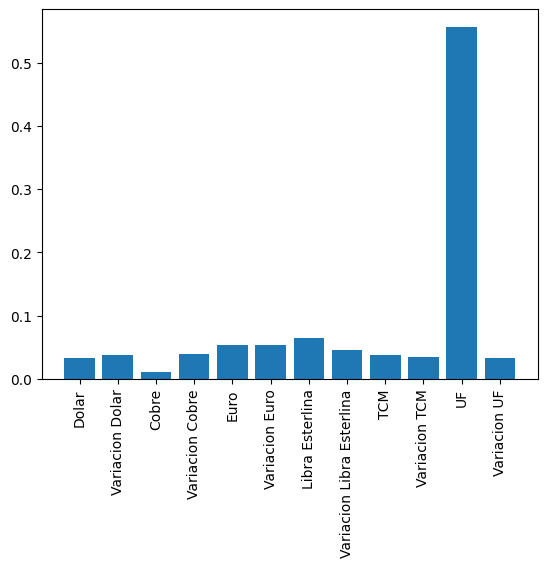

Feature: Dolar, Score: 2.83
Feature: Variacion Dolar, Score: 1.05
Feature: Cobre, Score: -0.06
Feature: Variacion Cobre, Score: 0.66
Feature: Euro, Score: 0.56
Feature: Variacion Euro, Score: 0.81
Feature: Libra Esterlina, Score: 2.75
Feature: Variacion Libra Esterlina, Score: 0.60
Feature: TCM, Score: 0.06
Feature: Variacion TCM, Score: 0.40
Feature: UF, Score: 90.26
Feature: Variacion UF, Score: 0.08


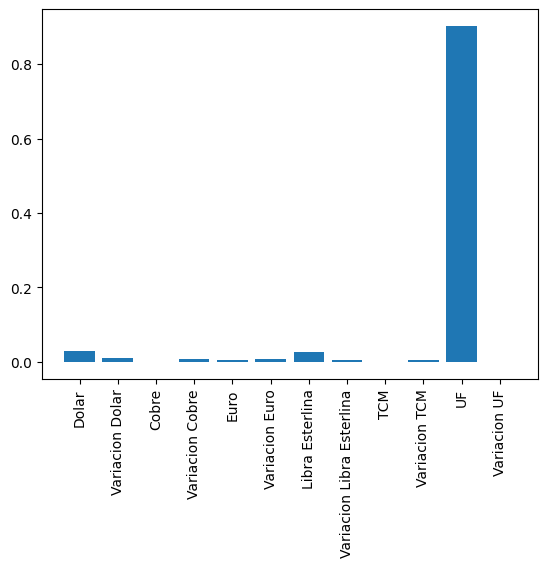

In [32]:
Imp(modelo2)
Imp2(modelo2)

LDA:
  Accuracy Score  : 0.9
  Precision Score : 0.51
  Recall Score    : 0.58
  F1 Score        : 0.54
  ROC AUC Score   : 0.76


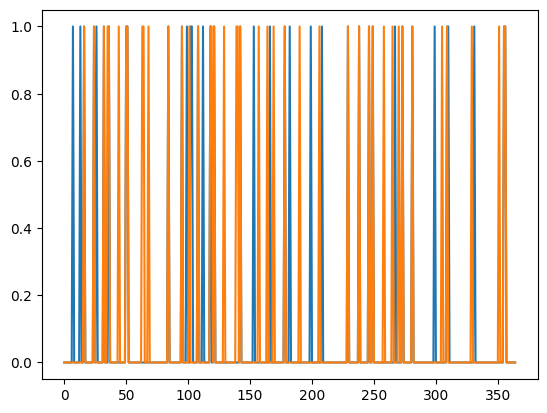

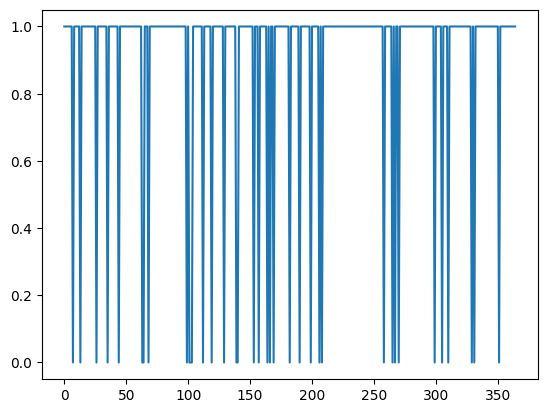

In [26]:
print("LDA:")
print(f"  Accuracy Score  : {round(accuracy_score(y_test, modelo3_y_pred), 2)}")
print(f"  Precision Score : {round(precision_score(y_test, modelo3_y_pred), 2)}")
print(f"  Recall Score    : {round(recall_score(y_test, modelo3_y_pred), 2)}")
print(f"  F1 Score        : {round(f1_score(y_test, modelo3_y_pred), 2)}")
print(f"  ROC AUC Score   : {round(roc_auc_score(y_test, modelo3_y_pred), 2)}")

Graf(modelo3_y_pred)

Feature: Dolar, Score: 2.56
Feature: Variacion Dolar, Score: -0.05
Feature: Cobre, Score: 5.84
Feature: Variacion Cobre, Score: 0.05
Feature: Euro, Score: 15.09
Feature: Variacion Euro, Score: 0.16
Feature: Libra Esterlina, Score: 36.13
Feature: Variacion Libra Esterlina, Score: 0.18
Feature: TCM, Score: 10.60
Feature: Variacion TCM, Score: 0.02
Feature: UF, Score: 29.44
Feature: Variacion UF, Score: -0.02


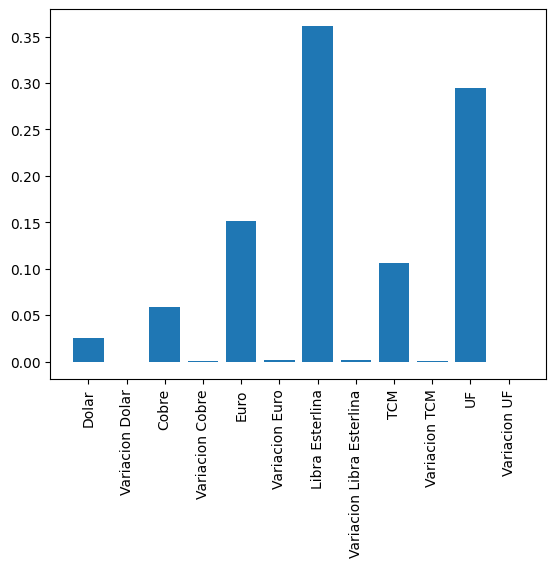

In [33]:
Imp2(modelo3)

Modelo Ensamble:
  Accuracy Score  : 0.88
  Precision Score : 0.4
  Recall Score    : 0.32
  F1 Score        : 0.35
  ROC AUC Score   : 0.63


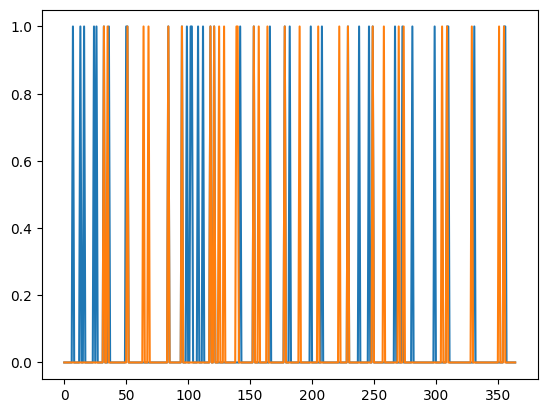

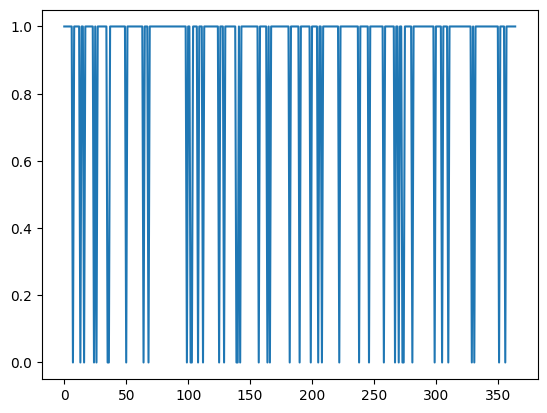

In [22]:
print("Modelo Ensamble:")
print(f"  Accuracy Score  : {round(accuracy_score(y_test, preds_ensamble), 2)}")
print(f"  Precision Score : {round(precision_score(y_test, preds_ensamble), 2)}")
print(f"  Recall Score    : {round(recall_score(y_test, preds_ensamble), 2)}")
print(f"  F1 Score        : {round(f1_score(y_test, preds_ensamble), 2)}")
print(f"  ROC AUC Score   : {round(roc_auc_score(y_test, preds_ensamble), 2)}")

Graf(preds_ensamble)

In [ ]:
import datetime as dt
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')
MC = pd.read_csv(r'MC.csv')

caracteristicas = list(MC.columns)
caracteristicas.remove('Fecha')
caracteristicas.remove('Aumenta Mañana')

X = MC.loc[:,caracteristicas].to_numpy()

etiqueta = ['Aumenta Mañana']
y = MC.loc[:,etiqueta].to_numpy()

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


Feature: Dolar, Score: 7.84
Feature: Variacion Dolar, Score: 5.44
Feature: Cobre, Score: 5.66
Feature: Variacion Cobre, Score: 5.59
Feature: Euro, Score: 8.48
Feature: Variacion Euro, Score: 5.72
Feature: Libra Esterlina, Score: 8.01
Feature: Variacion Libra Esterlina, Score: 4.16
Feature: TCM, Score: 7.99
Feature: Variacion TCM, Score: 4.47
Feature: UF, Score: 31.36
Feature: Variacion UF, Score: 5.29


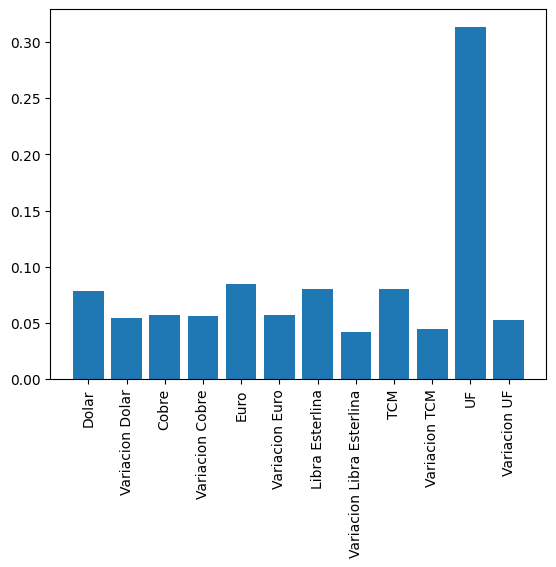

Feature: Dolar, Score: 0.11
Feature: Variacion Dolar, Score: 0.01
Feature: Cobre, Score: 0.00
Feature: Variacion Cobre, Score: 0.01
Feature: Euro, Score: 0.02
Feature: Variacion Euro, Score: 0.00
Feature: Libra Esterlina, Score: 0.01
Feature: Variacion Libra Esterlina, Score: 0.05
Feature: TCM, Score: 0.00
Feature: Variacion TCM, Score: 0.00
Feature: UF, Score: 99.67
Feature: Variacion UF, Score: 0.11


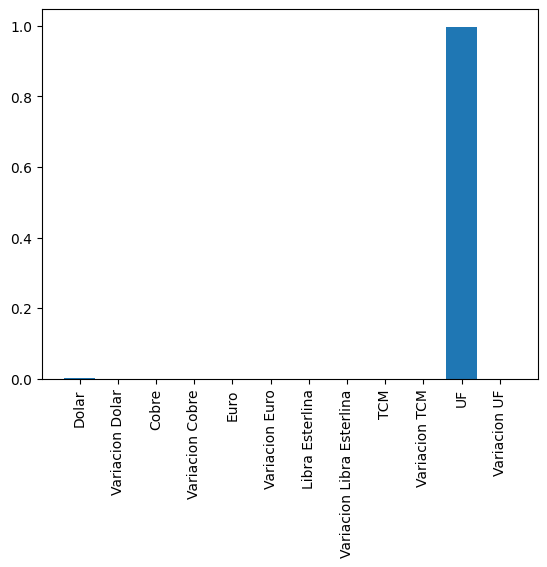

Feature: Dolar, Score: 4.31
Feature: Variacion Dolar, Score: 0.19
Feature: Cobre, Score: 0.01
Feature: Variacion Cobre, Score: 0.00
Feature: Euro, Score: 9.14
Feature: Variacion Euro, Score: 0.22
Feature: Libra Esterlina, Score: 5.08
Feature: Variacion Libra Esterlina, Score: 0.84
Feature: TCM, Score: 0.07
Feature: Variacion TCM, Score: 0.05
Feature: UF, Score: 80.13
Feature: Variacion UF, Score: -0.03


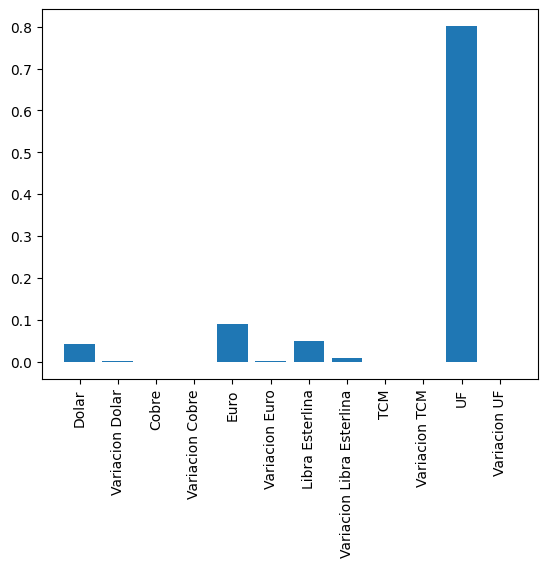

In [2]:
import datetime as dt
import numpy as np
import pandas as pd
from matplotlib import pyplot
import warnings
warnings.simplefilter('ignore')
MC = pd.read_csv(r'MC.csv')

caracteristicas = list(MC.columns)
caracteristicas.remove('Fecha')
caracteristicas.remove('Aumenta Mañana')
X = MC.loc[:,caracteristicas].to_numpy()
etiqueta = ['Aumenta Mañana']
y = MC.loc[:,etiqueta].to_numpy()


from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#------------------------------------------------------------------------

model = RandomForestClassifier()
model.fit(X, y)
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0s, Score: %.2f' % (caracteristicas[i],v*100))

y_pos = range(len(caracteristicas))
pyplot.bar(y_pos, importance)
pyplot.xticks(y_pos, caracteristicas, rotation=90)
pyplot.show()

#------------------------------------------------------------------------

from sklearn.inspection import permutation_importance

model = RandomForestClassifier()
model.fit(X, y)
results = permutation_importance(model, X, y, scoring='roc_auc')
importance_0 = results.importances_mean
importance = [ii/sum(importance_0) for ii in importance_0]

for i,v in enumerate(importance):
    print('Feature: %0s, Score: %.2f' % (caracteristicas[i],v*100))

y_pos = range(len(caracteristicas))
pyplot.bar(y_pos, importance)
pyplot.xticks(y_pos, caracteristicas, rotation=90)
pyplot.show()

#------------------------------------------------------------------------

model = KNeighborsClassifier()
model.fit(X, y)
results = permutation_importance(model, X, y, scoring='roc_auc')
importance_0 = results.importances_mean
importance = [ii/sum(importance_0) for ii in importance_0]

for i,v in enumerate(importance):
    print('Feature: %0s, Score: %.2f' % (caracteristicas[i],v*100))

y_pos = range(len(caracteristicas))
pyplot.bar(y_pos, importance)
pyplot.xticks(y_pos, caracteristicas, rotation=90)
pyplot.show()

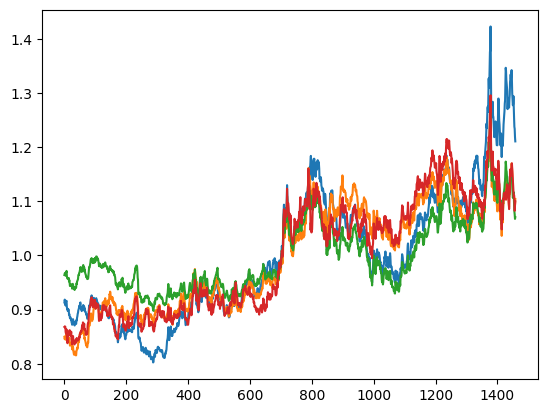

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
MC = pd.read_csv(r'MC.csv')

fig, ax = plt.subplots()
ax.plot(MC['Dolar']/(sum(MC['Dolar'])/len(MC['Dolar'])))
ax.plot(MC['Euro']/(sum(MC['Euro'])/len(MC['Euro'])))
ax.plot(MC['TCM']/(sum(MC['TCM'])/len(MC['TCM'])))
ax.plot(MC['Libra Esterlina']/(sum(MC['Libra Esterlina'])/len(MC['Libra Esterlina'])))

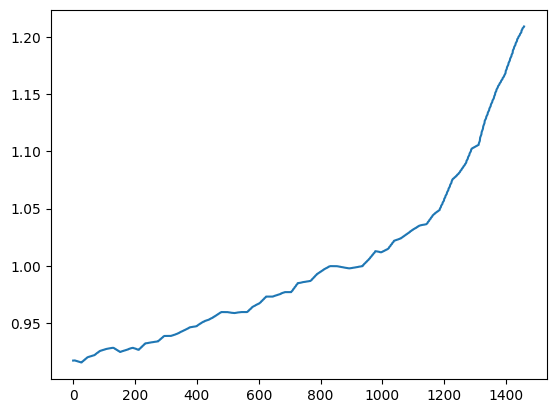

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
MC = pd.read_csv(r'MC.csv')

fig, ax = plt.subplots()
ax.plot(MC['UF']/(sum(MC['UF'])/len(MC['UF'])))

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

MC = pd.read_csv(r'MC.csv')

caracteristicas = list(MC.columns)
caracteristicas.remove('Fecha')
caracteristicas.remove('Aumenta Mañana')
X = MC.loc[:,caracteristicas].to_numpy()
etiqueta = ['Aumenta Mañana']
y = MC.loc[:,etiqueta].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

ad = DecisionTreeClassifier(max_depth = 6)
ad.fit(X_train, y_train)
Y_pred = ad.predict(X_test)


with open("mi_arbol.dot", 'w') as archivo_dot:
    tree.export_graphviz(ad, out_file = archivo_dot, filled=True, rounded=True, special_characters=False, impurity=False, feature_names=caracteristicas)